# 6.6 Sourcing & Analyzing Time Series Data
### New York Citi Bikes

## 01 Import Data

In [1]:
# Import Libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight') 

In [2]:
# Set Path
path = r'C:\Users\cshat\09-2023 Citi Bikes Project'

In [3]:
# Import Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_clean.csv'), index_col = False)

This dataset already contains timeseries data so no additional datasets will be imported from quandl.

## 02 Prepare Data

In [4]:
df.head()

,Unnamed: 0,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,5,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2


In [5]:
df = df.drop(columns =['Unnamed: 0'])

In [6]:
# Rename Datetime Column
df = df.rename(columns={'start_time': 'start_datetime', 'end_time': 'end_datetime'})

In [7]:
# Change Datetime Data Type
df['start_datetime'] = df['start_datetime'].astype('datetime64[ns]')
df['end_datetime'] = df['end_datetime'].astype('datetime64[ns]')

In [8]:
# Separate Date and Time
df = df.assign(start_date=df["start_datetime"].dt.date)
df = df.assign(end_date=df["end_datetime"].dt.date)
df = df.assign(start_time=df["start_datetime"].dt.time)
df = df.assign(end_time=df["end_datetime"].dt.time)

In [9]:
# Change Date Data Type
df['start_date'] = df['start_date'].astype('datetime64[ns]')
df['end_date'] = df['end_date'].astype('datetime64[ns]')

In [10]:
df.dtypes

day_of_week                        object
start_hour                          int64
start_datetime             datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_datetime               datetime64[ns]
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
trip_duration                       int64
subscriber                         object
birth_year                        float64
gender                              int64
start_date                 datetime64[ns]
end_date                   datetime64[ns]
start_time                         object
end_time                           object
dtype: object

In [11]:
df.shape

(42975, 20)

In [12]:
df.columns

Index(['day_of_week', 'start_hour', 'start_datetime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_datetime', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'start_date',
       'end_date', 'start_time', 'end_time'],
      dtype='object')

In [13]:
df_sub = df.groupby('start_date', as_index=False)[['day_of_week', 'start_station_id', 'end_station_id', 'trip_duration', 'subscriber', 'birth_year', 'gender']].mean()

In [14]:
df_sub.head()

,start_date,start_station_id,end_station_id,trip_duration,birth_year,gender
0,2013-09-01,448.357326,411.041131,835.948586,1977.114396,1.318766
1,2013-09-02,414.623149,425.510094,751.578735,1976.083445,1.306864
2,2013-09-03,448.379656,428.493553,762.717765,1975.192693,1.237106
3,2013-09-04,425.780298,424.355800,788.075178,1975.401167,1.223590
4,2013-09-05,427.088625,428.958130,782.309142,1975.171668,1.244941


## 03 Line Graphs

In [15]:
# Birth Year
df_sub_01 = df_sub[['start_date', 'birth_year']]

In [16]:
from datetime import date

df_sub_01['datetime'] = pd.to_datetime(df_sub_01['start_date'], format='%Y') 
df_sub_01 = df_sub_01.set_index('datetime') 
df_sub_01.drop(['start_date'], axis=1, inplace=True) 
df_sub_01.head()

,birth_year
datetime,
2013-09-01,1977.114396
2013-09-02,1976.083445
2013-09-03,1975.192693
2013-09-04,1975.401167
2013-09-05,1975.171668


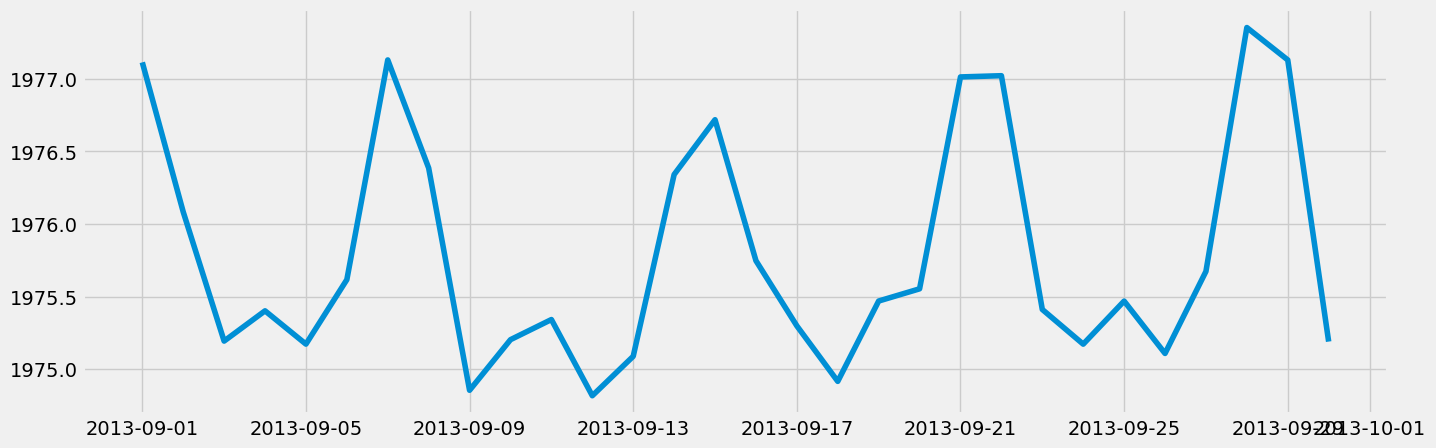

In [17]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub_01)

There is a pattern throughout the month in regards to the average age of riders. I'm curious whether it correlates with certain days of the week.

In [18]:
# Gender
df_sub_02 = df_sub[['start_date', 'gender']]

In [19]:
from datetime import date

df_sub_02['datetime'] = pd.to_datetime(df_sub_02['start_date'], format='%Y') 
df_sub_02 = df_sub_02.set_index('datetime') 
df_sub_02.drop(['start_date'], axis=1, inplace=True) 
df_sub_02.head()

,gender
datetime,
2013-09-01,1.318766
2013-09-02,1.306864
2013-09-03,1.237106
2013-09-04,1.223590
2013-09-05,1.244941


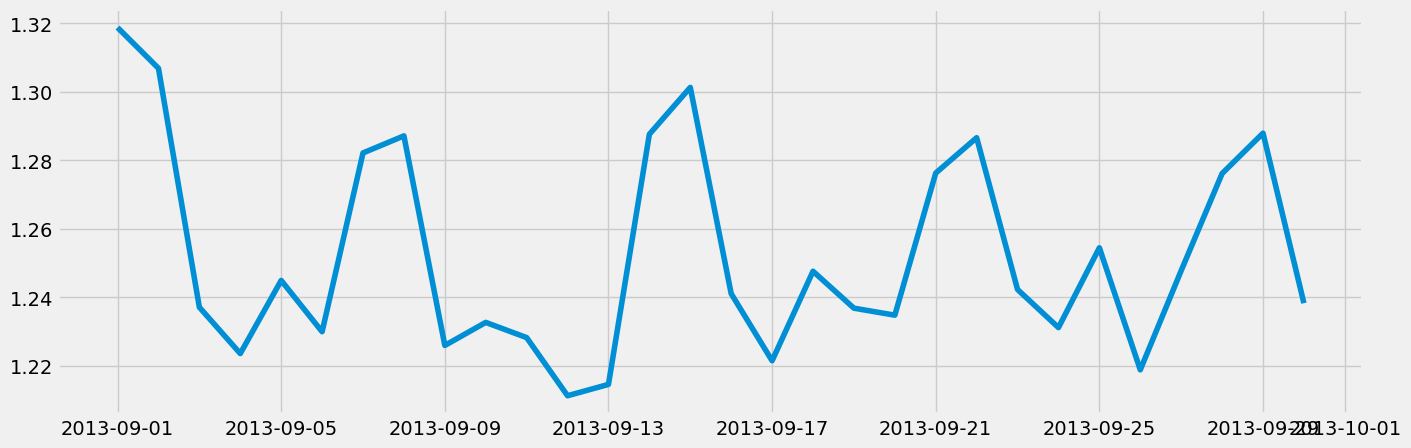

In [20]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub_02)

Note that his is an average of a binary. 1 = male and 2 = female. So the higher y values indicate more female activity. There is certainly a pattern. It looks similar to the previous graph so perhaps total volume is affecting both.

In [21]:
# Trip Duration
df_sub_03 = df_sub[['start_date', 'trip_duration']]

In [22]:
from datetime import date

df_sub_03['datetime'] = pd.to_datetime(df_sub_03['start_date'], format='%Y') 
df_sub_03 = df_sub_03.set_index('datetime') 
df_sub_03.drop(['start_date'], axis=1, inplace=True) 
df_sub_03.head()

,trip_duration
datetime,
2013-09-01,835.948586
2013-09-02,751.578735
2013-09-03,762.717765
2013-09-04,788.075178
2013-09-05,782.309142


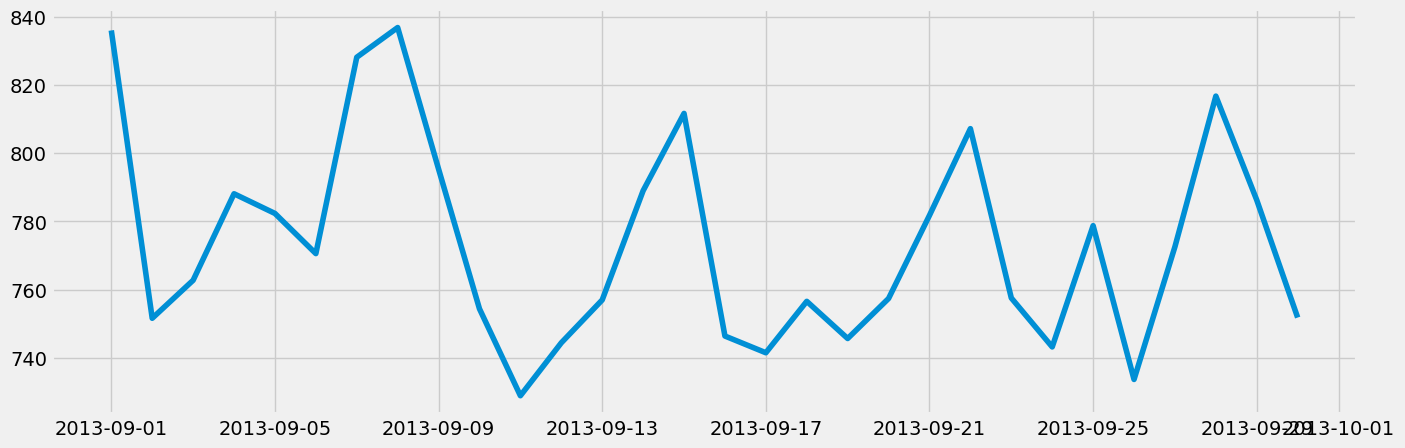

In [23]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub_03)

There is a fluctuation in average trip duration throughout the month. This may also be impacted by days of the week.

## 04 Decomposition

The rest of this task will be completed using df_sub_01 (birth year).

In [24]:
decomposition = sm.tsa.seasonal_decompose(df_sub_01, model='additive')

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

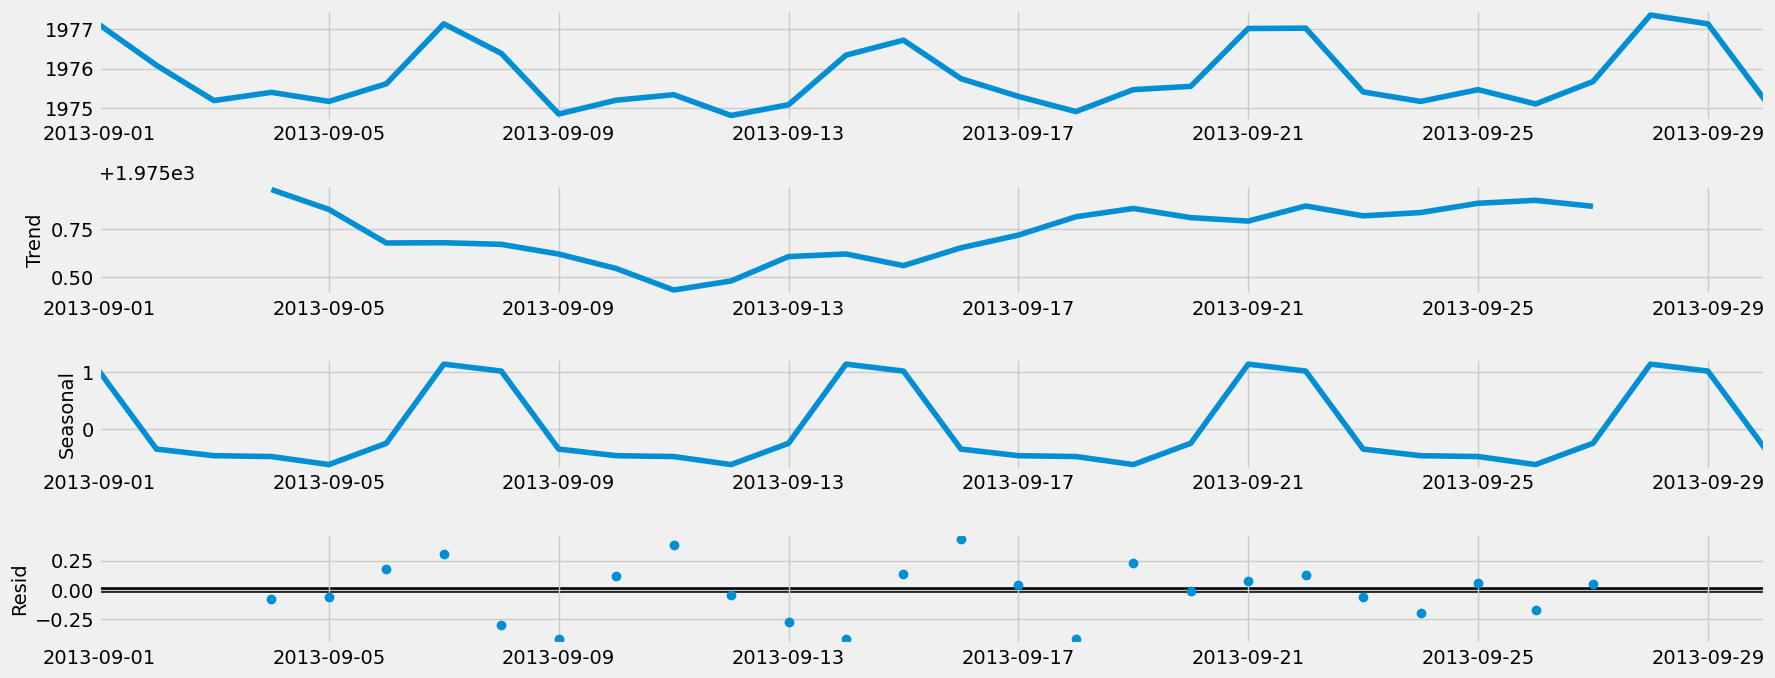

In [26]:
decomposition.plot()
plt.show()

There is an upward trend, the data is seasonal, and there is a lot of noise. I do not expect this data to be stationary.

## 05 Dickey-Fuller Test

In [27]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_sub_01['birth_year'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.509800
p-value                         0.528658
Number of Lags Used             6.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


The data is non-stationary. The test statistic is greater than the critical value and therefore we cannot reject the null-hypothesis.

## 06 Differencing

In [28]:
df_sub_01_diff = df_sub_01 - df_sub_01.shift(1)

In [29]:
df_sub_01_diff.dropna(inplace = True)

In [30]:
df_sub_01_diff.head()

,birth_year
datetime,
2013-09-02,-1.030950
2013-09-03,-0.890752
2013-09-04,0.208473
2013-09-05,-0.229499
2013-09-06,0.444627


In [31]:
df_sub_01_diff.columns

Index(['birth_year'], dtype='object')

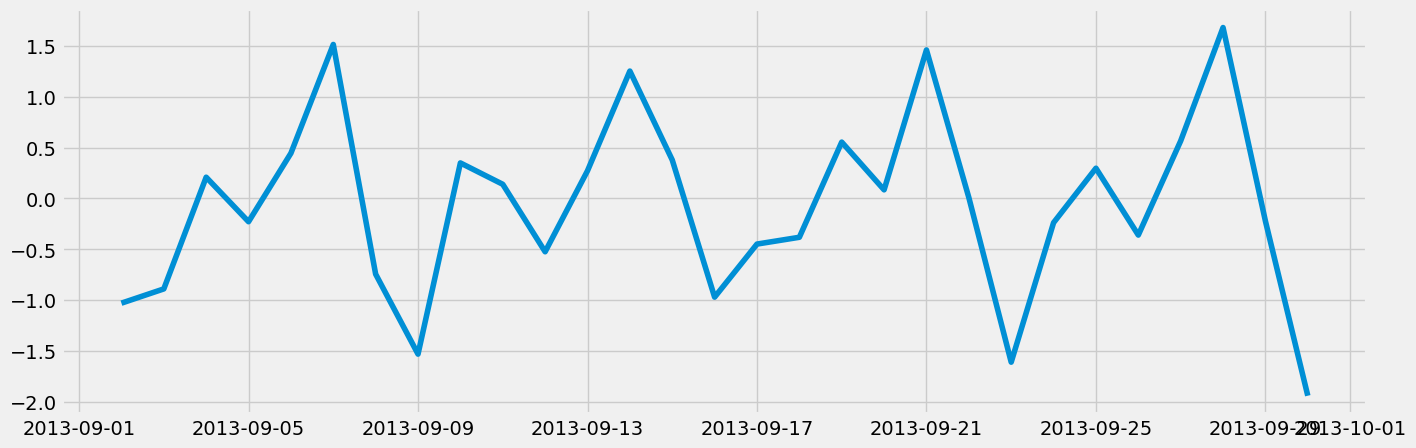

In [32]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub_01_diff)

In [33]:
dickey_fuller(df_sub_01_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.386977
p-value                         0.000004
Number of Lags Used             5.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


The data is now stationary. The test statistic is less than the critical value. The p-value is also under 0.05.

## 07 Autocorrelations

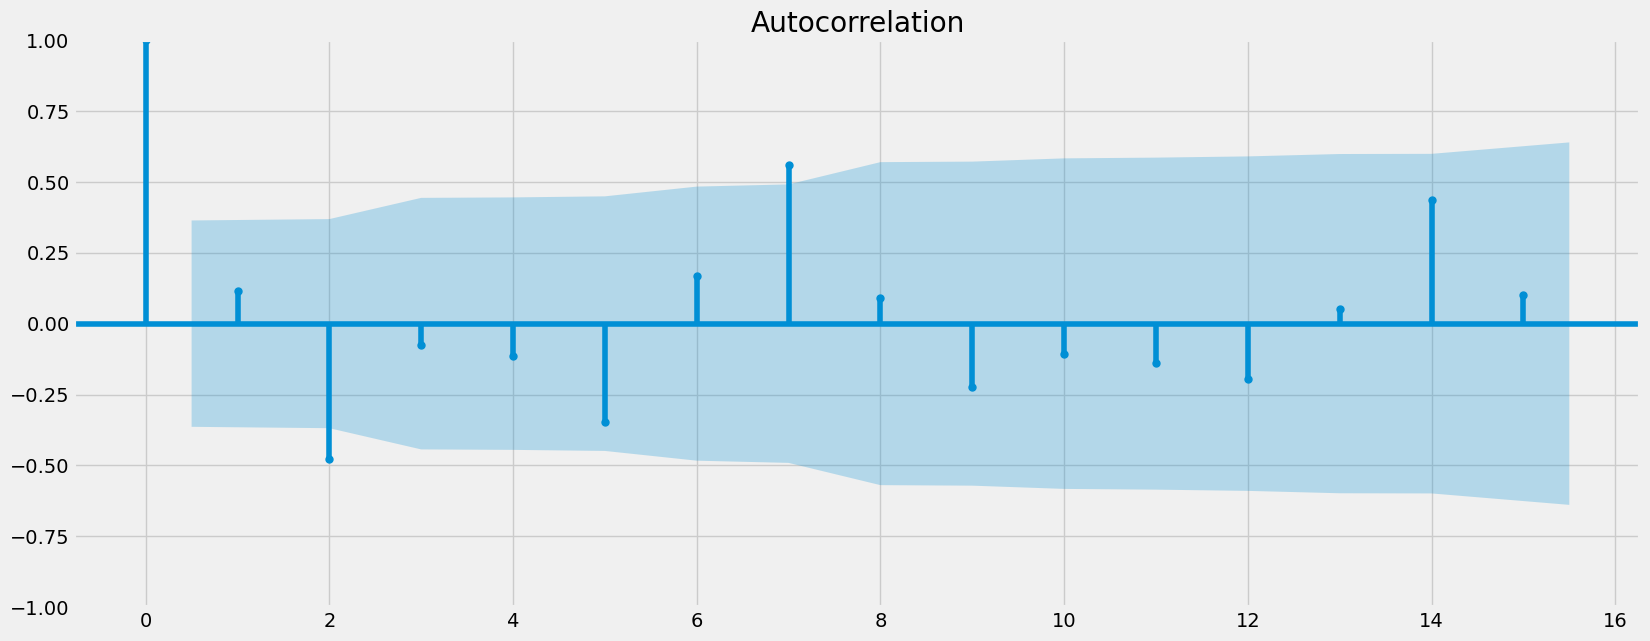

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_sub_01_diff)
plt.show()

There are 2 lags outside of the blue region. Another differencing will be done to correct this.

In [35]:
# Differencing - Round 2
df_sub_01_diff_01 = df_sub_01_diff - df_sub_01_diff.shift(1)

In [36]:
df_sub_01_diff_01.dropna(inplace = True)

In [37]:
df_sub_01_diff_01.head()

,birth_year
datetime,
2013-09-03,0.140198
2013-09-04,1.099225
2013-09-05,-0.437972
2013-09-06,0.674125
2013-09-07,1.070199


In [38]:
df_sub_01_diff_01.columns

Index(['birth_year'], dtype='object')

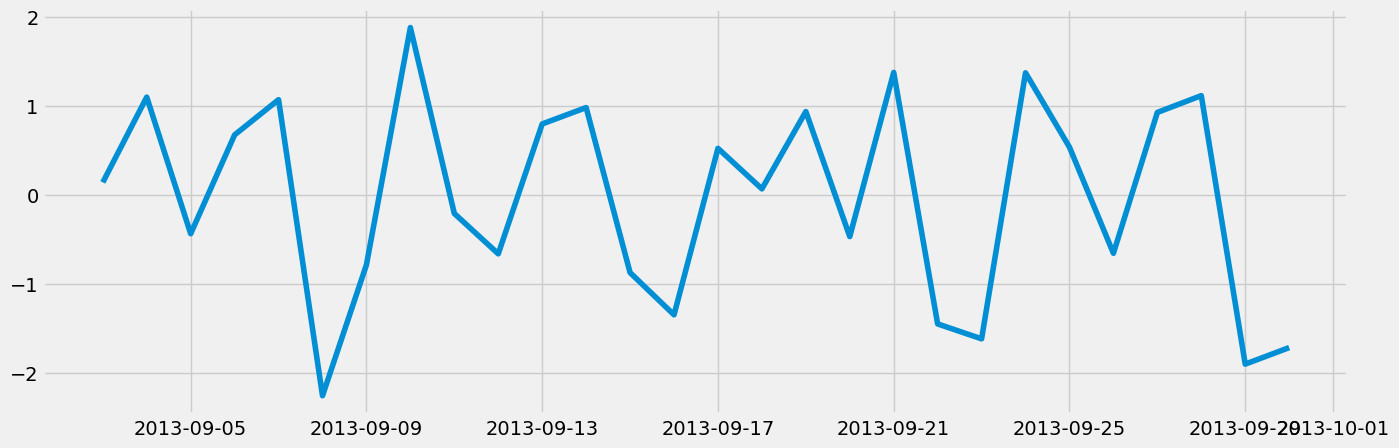

In [39]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub_01_diff_01)

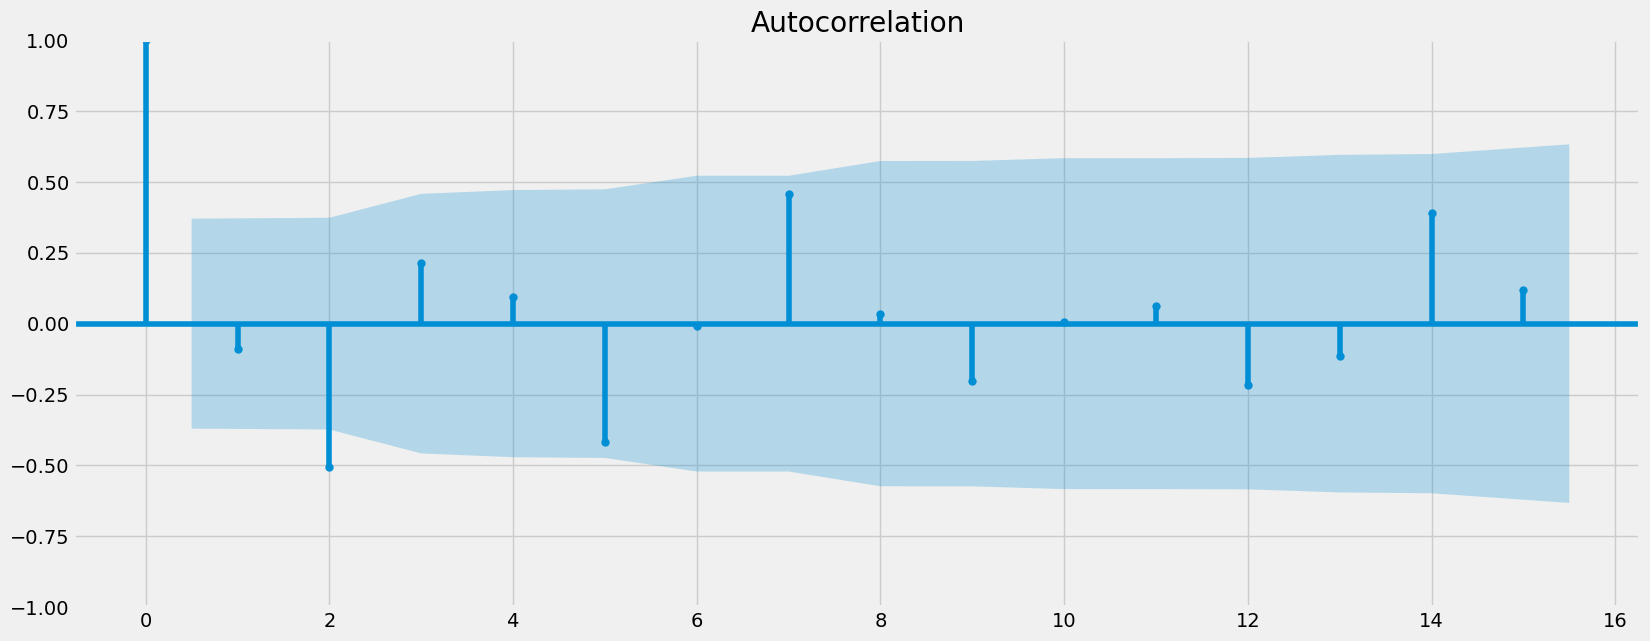

In [40]:
plot_acf(df_sub_01_diff_01)
plt.show()

There is 1 lag outside of the blue region. Another differencing will be done to correct this.

In [41]:
# Differencing - Round 3
df_sub_01_diff_02 = df_sub_01_diff_01 - df_sub_01_diff_01.shift(1)

In [42]:
df_sub_01_diff_02.dropna(inplace = True)

In [43]:
df_sub_01_diff_02.head()

,birth_year
datetime,
2013-09-04,0.959027
2013-09-05,-1.537197
2013-09-06,1.112097
2013-09-07,0.396074
2013-09-08,-3.330254


In [44]:
df_sub_01_diff_02.columns

Index(['birth_year'], dtype='object')

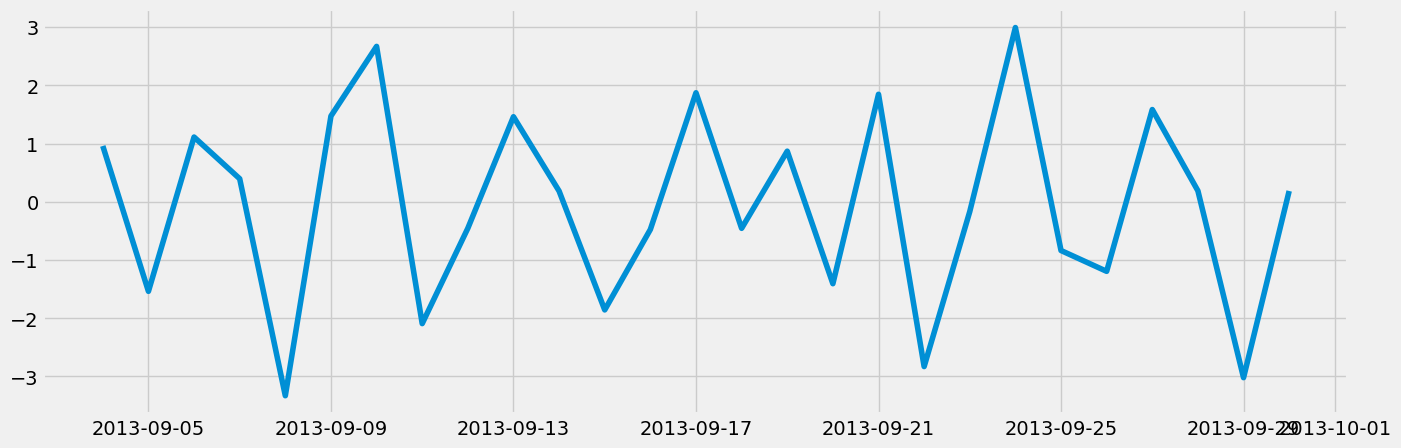

In [45]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub_01_diff_02)

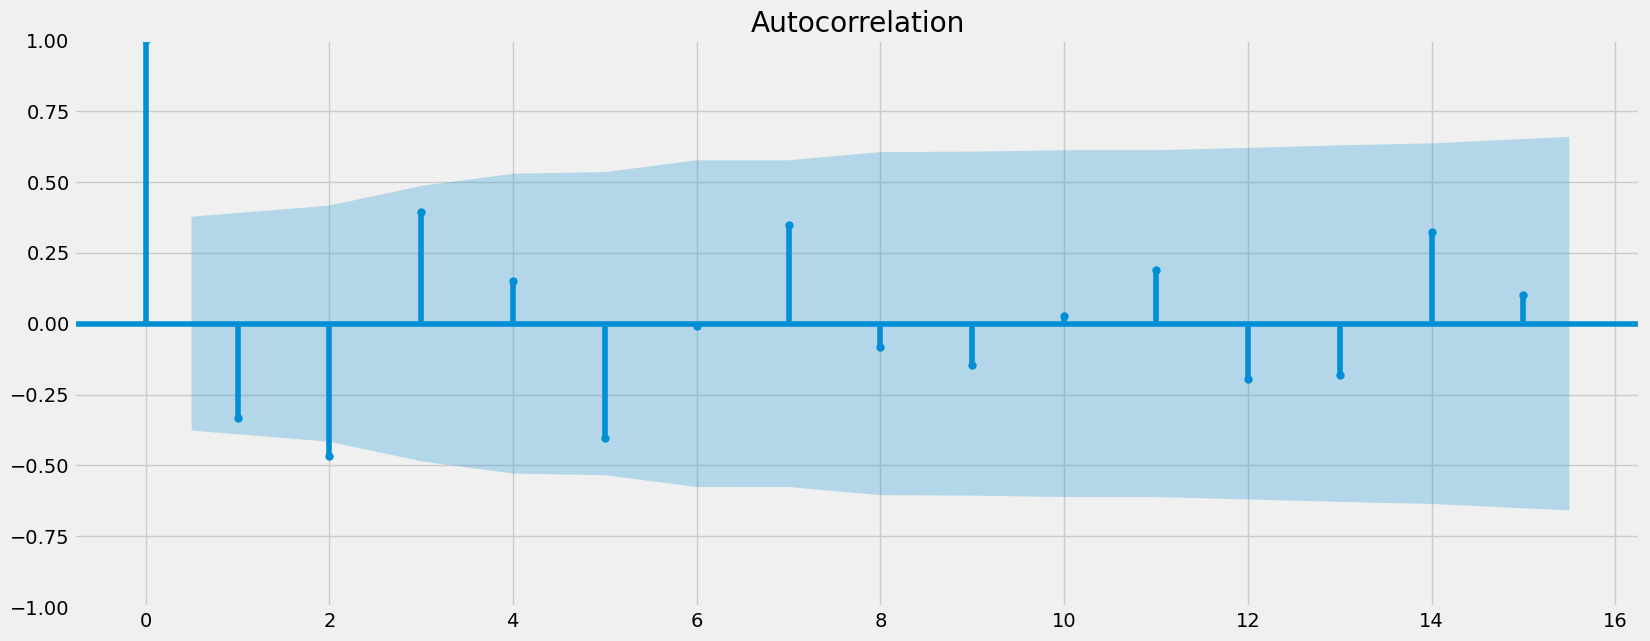

In [46]:
plot_acf(df_sub_01_diff_02)
plt.show()

There is still 1 lag outside of the blue region. However, this is probably as close as it is going to get to being stationary.

In [48]:
# Export
df.to_csv(os.path.join(path,  '02 Data', 'Prepared Data', 'citibike_clean_02.csv'))